# Classification

In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
primary_key = ['dialog_id', 'speaker', 'da_tag', 'start_time', 'end_time']

## Load Data

In [3]:
text_train = pd.read_csv('../features/train_text_features.csv', index_col=0)
text_test = pd.read_csv('../features/test_text_features.csv', index_col=0)

In [4]:
speech_train = pd.read_csv('../features/train_speech_features.csv', index_col=0)
speech_test = pd.read_csv('../features/test_speech_features.csv', index_col=0)

In [5]:
text_speech_train = pd.read_csv('../features/train_features.csv', index_col=0)
text_speech_test = pd.read_csv('../features/test_features.csv', index_col=0)

## Compare Models

### Decision Tree

In [6]:
def train_dt_classifier(train, test):
    clf = tree.DecisionTreeClassifier()
    clf.fit(train.drop(primary_key, axis=1), train['da_tag'])

    preds = clf.predict(test.drop(primary_key, axis=1))
    labels = test['da_tag']
                        
    print('F1 score:', f1_score(labels, preds, average='macro'))
    print('Accuracy:', accuracy_score(labels, preds))
    
    cm = confusion_matrix(labels, preds, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

F1 score: 0.5007182322257846
Accuracy: 0.7365887809573817


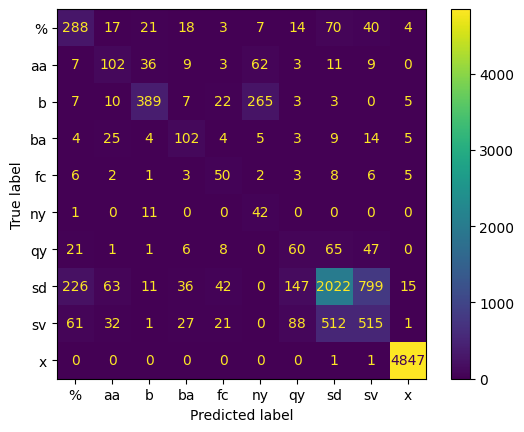

In [7]:
train_dt_classifier(text_train, text_test)

F1 score: 0.179452337394987
Accuracy: 0.38800347725297013


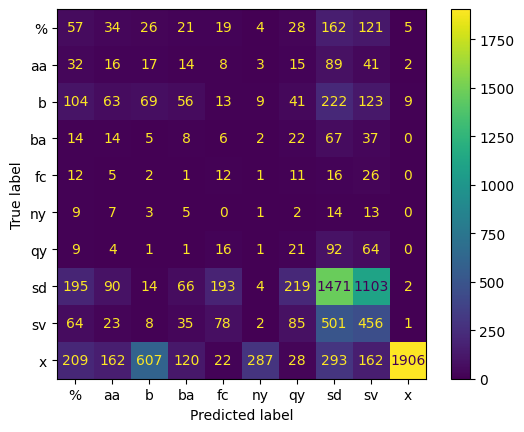

In [8]:
train_dt_classifier(speech_train, speech_test)

F1 score: 0.38980864150514904
Accuracy: 0.6456099681251811


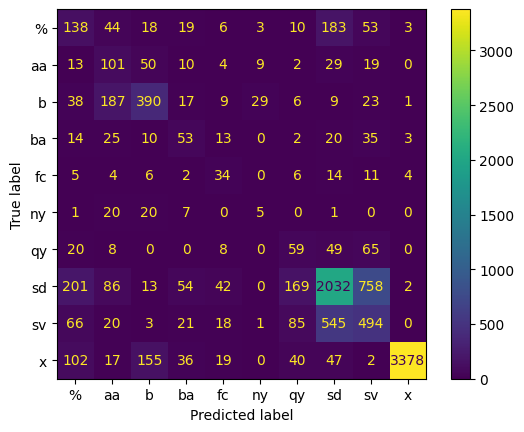

In [9]:
train_dt_classifier(text_speech_train, text_speech_test)

### SVM

In [10]:
def train_svm_classifier(train, test):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(train.drop(primary_key, axis=1), train['da_tag'])

    preds = clf.predict(test.drop(primary_key, axis=1))
    labels = test['da_tag']
                        
    print('F1 score:', f1_score(labels, preds, average='macro'))
    print('Accuracy:', accuracy_score(labels, preds))
    
    cm = confusion_matrix(labels, preds, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

F1 score: 0.544577422045475
Accuracy: 0.7674805285726788


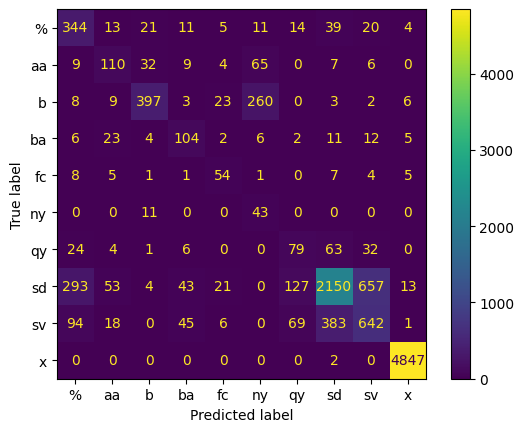

In [11]:
train_svm_classifier(text_train, text_test)

F1 score: 0.09192146971157258
Accuracy: 0.29527673138220806


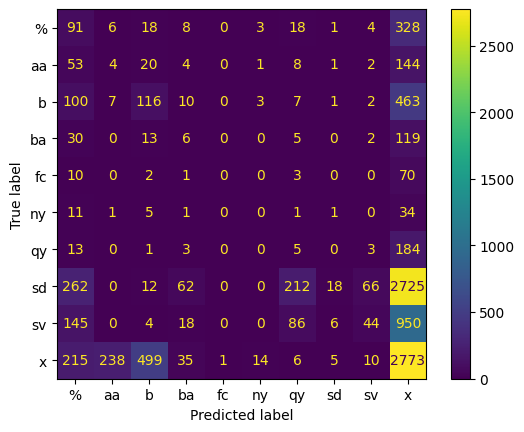

In [12]:
train_svm_classifier(speech_train, speech_test)

F1 score: 0.4666728467924033
Accuracy: 0.6847290640394089


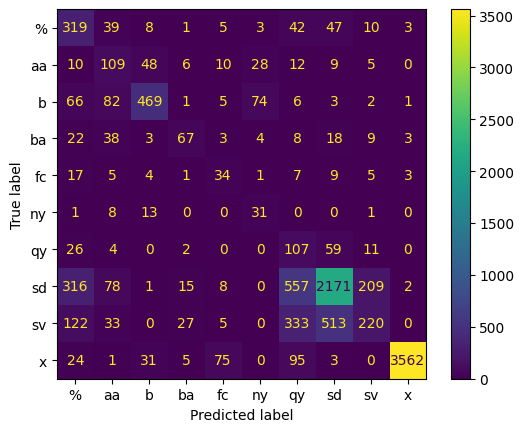

In [13]:
train_svm_classifier(text_speech_train, text_speech_test)

### Random Forest

In [26]:
def train_rf_classifier(train, test):
    clf = RandomForestClassifier()
    clf.fit(train.drop(primary_key, axis=1), train['da_tag'])

    preds = clf.predict(test.drop(primary_key, axis=1))
    labels = test['da_tag']
                        
    print('F1 score:', f1_score(labels, preds, average='macro'))
    print('Accuracy:', accuracy_score(labels, preds))
    
    cm = confusion_matrix(labels, preds, labels=clf.classes_, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

F1 score: 0.5958218258456054
Accuracy: 0.8058107989848604


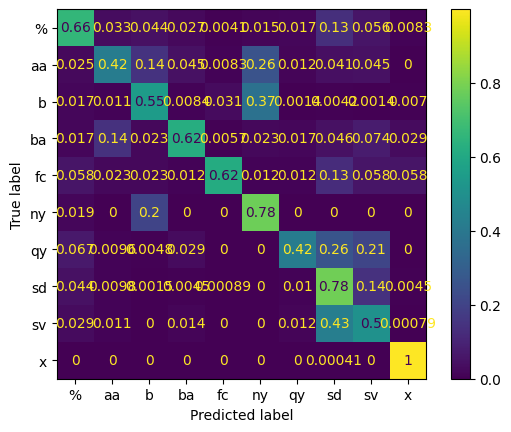

In [27]:
train_rf_classifier(text_train, text_test)

F1 score: 0.1958413215776552
Accuracy: 0.5627354390031875


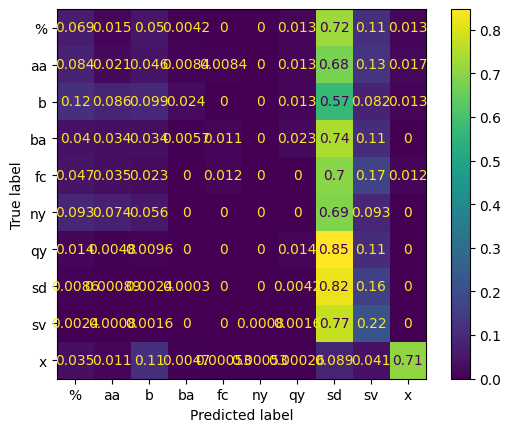

In [21]:
train_rf_classifier(speech_train, speech_test)

F1 score: 0.5977646297931554
Accuracy: 0.8067226890756303


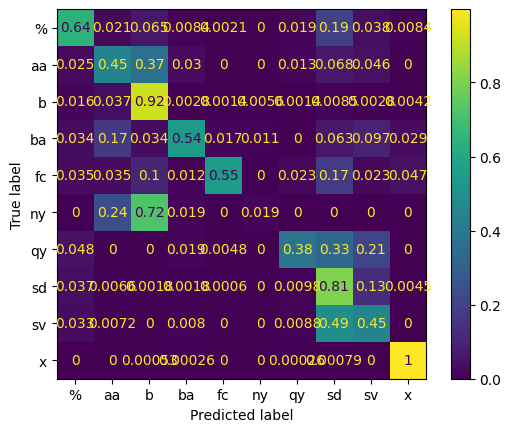

In [22]:
train_rf_classifier(text_speech_train, text_speech_test)